# Lecture 3 - Numpy and Pandas: Python Examples

## 1. File Handling in Python
Let's first see what is the documentation for the open function

In [ ]:
help("open")

Now lets check what is it the open returns

In [ ]:
# Open file and check the handler object
fhandle = open('mbox_short.txt', 'r')
print(fhandle)

#### Counting lines

In [ ]:
# Open and read the file and count the number of lines
fhandle = open('mbox_short.txt', 'r')
count =0
for line in fhandle:
    count+=1
print("Total number of lines: ",count)

### But what happens to the file handler as we read the file:
1. Does remain pointing at the start of the file?
2. Does it move into the file content as we read through it?

In [ ]:
# Open and read the file and count the number of lines
fhandle = open('mbox_short.txt', 'r')
count =0
# next line uses the function tell from the file handler object that tells yoou where the file handler is currently pointing
print(fhandle.tell())
for line in fhandle:
    count+=1
print(fhandle.tell())
print("Total number of lines: ",count)

### Time for some data manipulation
Let's Selectively display information from the file

In [ ]:
# Open and read the file
fhandle = open('mbox_short.txt', 'r')
for line in fhandle:
    if line.startswith("From:"):
        print(line)

Why do we have extra Spacing between the lines?
    Remember, each line string we fetch ahs an end of line (\n) at its end, and print adds another one to move to next line by default
    let's fix this to remove the extra spacing 

In [ ]:
# Open and read the file
fhandle = open('mbox_short.txt', 'r')
for line in fhandle:
    line= line.rstrip()
    if line.startswith("From:"):
        print(line)

Alternatively, modify print to not move to next line

In [ ]:
# Open and read the file
fhandle = open('mbox_short.txt', 'r')
for line in fhandle:
    if line.startswith("From:"):
        print(line,end="")

## 2. NumPy Basics
Let's Get numpy added to our environment

In [61]:
# importing numpy
import numpy as np

Now let's start with some basic numpy arrays

In [ ]:
# Creating NumPy arrays


# Creating a simple 1D array
arr = np.array([1, 2, 3, 4, 5])
print("1D array:")
print(arr)

# Creating a 2D array
arr_2d = np.array([[1, 2, 3], [4, 5, 6]])
print("\n2D array:")
print(arr_2d)

# Creating an array filled with zeros ... note that the deafult output of this function is floating point array
zeros = np.zeros((3, 3))
print("\nA pre-populated 2D array of Zeros")
print(zeros)

Data in the numpy array should conform to the same data type, in some cases if a mix of data types is used, some of the values can be upcast.
This will work only in case of data consistency, meaning no string and numerical values together, but numerical values of different forms is ok

In [ ]:
# Array Operations
arr = np.array([1, 2, 3, 4, 5])
print("All int list passed to the array constructor will generate an int array:")
print(arr)

# upcasting
arr = np.array([1.0, 2, 3, 4, 5])
print("\nMixing numerical values of different types will upcast all values to the higher representation data type:")
print(arr)

# excplicit typing
arr = np.array([1, 2, 3, 4, 5],dtype="float32")
print("\nCasting int values to float in the array")
print(arr)

arr = np.array([1.5, 2, 3, 4, 5],dtype="int")
print("\nCasting mixed types to int")
print(arr)

# using list comprehension in the array construction
arr = np.array([n for n in range(20)])
print("\nList comprehension as input for 1D array creation:")
print(arr) 


arr = np.array([range(m,m + 4) for m in range(8)])
print("\nList comprehension as input for 2D array creation:")
print(arr)


Some more examples of numpy array creation methods

In [ ]:
arr = np.zeros(10,dtype="int")
print("Array of zeros of Int:")
print(arr)

arr = np.zeros((3,3))
print("\n2D Array of Zeros:")
print(arr)

arr = np.random.randint(0,10,(3,3))
print("\n2D Random number generated array of numbers in the range 0 to 10")
print(arr)

Some extra capabilities of numpy library that are powerful:
1. broadcasting
2. universal functions

In [ ]:
lst = [n for n in range(10)]
'''lst += 5
print(lst)'''

arr = np.array(lst)
print("Original array from List of numbers from 0 to 10:")
print(arr)
arr += 5
print("\nModified array with added 5 to all elements based on broadcasting:")
print(arr)



x = np.array([1, 2, 3])  # Shape (3,)
y = np.array([[10], [20], [30]])  # Shape (3, 1)

# Broadcasting will automatically happen
print(x+y)

### How much faster is numpy arrays operations over basic python list operations ?

In [ ]:
x = np.random.random(100000)
%timeit sorted(x) 
%timeit np.sort(x)


## 3. Pandas Basics

In [ ]:
# Creating a DataFrame
import pandas as pd

# create a DataFrame from List of Lists
df = pd.DataFrame([[4 , 7 , 10],\
                   [5 , 8 , 11],\
                   [6 , 9 , 12]],\
                   index = [1 ,2 , 3],\
                   columns = ['a' , 'b' , 'c'])


# printing the dataframe
print("Datframe created from a list of lists with provided indeces and Column names:")
print(df)
print()
print("Using Index Slicing on the Dataframe created")
print(df[1:2])
print()




## The Indeces Ambiguity in Pandas
When using an index list with the creation of the dataframe that is not the usual sequential sequence starting at 0, eg. [0 1 2 3 ....], differnet Rules apply depending on the situation: (this is an extension of the problem from Series)
1. numerical index list
2. other data type like string

In [ ]:
# create a DataFrame from List of Lists
s1 = pd.Series([4 , 7 , 10],\
                   index = [1 ,2 , 4])

s2 = pd.Series([4 , 7 , 10, 20],\
                   index = ['1' ,'2' , '4', '5'])


# printing the dataframe
print("Series 1 :")
print(s1)
print()
print("Series 1 content at index 1 ... note that this will use a direct index match from the list of indeces and not index position:")
print(s1[1])
print()
print("Series 1 content with slicing ... note that this will use the values in the bracket as positions of indeces in the index list:")
print(s1[1:2])
print()
print("Series 2 content with slicing ... this is different, since the indeces are strings, if a numerical value is used, then index position is used.\n\
      if string values that match the indeces are used, then the indeces themselves will be used for the slicing")
print("In the following we use a numerical value of 1 so it will use index[1] which is '2' as the key")
print(s2[1])
print()
print("Simalrly we are slicing here with numerical values so still works with position on the index list rather than the indeces themselves")
print(s2[1:3])
print()
print("Finally in the following we use slising based on indeces values of '1' and '4', note that this will include the upperbound unlike what usually happens with slicinig")
print(s2['1':'4'])




## More Pandas exercises
1. Creating a DataFrame from Dictionaries and Series
2. What Does direct indexing in a DF do?
 - Does it reference an index or does it reference a column?
3. Slicing
 - Does it only work for indeces, or does it extend to columns? 

In [ ]:
# Create a DataFrame from a dictionary

area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
population_dict = {'California': 38332521, 'Texas': 26448193, 'New York': 19651127,'Florida': 19552860, 'Illinois': 12882135}
population = pd.Series(population_dict)
print("The 2 data series that will be used for creating the DF")
print(area)
print()
print(population)

print()
print("The DataFrame:")
states = pd.DataFrame({'population': population , 'area': area}) 
print(states)
print()
print("Direct indexing a DF will always access columns, in the next print we use 'population' as the index")
print(states['population'])
print()

print("To access rows we use the loc and iloc methods:")
print("In the next example we use the loc accessor that works on indecese values:")
print()
print(states.loc['California'])
print()
print("In the next example we use the iloc accessor that works on indecese positions:")
print()
print(states.iloc[0])
print()


In [ ]:
# Slicing
print("Slicing works on Both columns and rows:")
print("Slicing with Columns: .... there is a caveate ... you must use loc or iloc for this to work")
print(states.loc[:,'population':'area'])
print()
print("Slicing rows: can be done with loc and iloc, but can also be done with regular indexing means as in lists but be carefull with ambiguities")
print("The following is using the conventional slicing for getting the first 3 rows")
print(states[0:3])
print()
print("Alternatively we recommend using loc and iloc to remove any ambiguity")
print("The following is the output of using loc to display the rows for 'California' to and including 'Florida'")
print(states.loc['California':'Florida'])
print()
print("Which can be done using iloc from position 0 to 4 ... note that loc includes the upperbound while iloc doesnt")
print(states.iloc[0:4])

Pandas will apply Ufunc from numpy on the dataframe, while preserving and aligning indeces. When adding 2 series of different indecese:
1. A common index list will be created that preserves indeces from both inputs
2. The common index will align common indeces from both inputs for the operations that will be applied
3. The 2 inputs will be broadcast to match the final index list and data for the added spots will be injected as NaN

In [ ]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
print(A + B)


data = pd.Series([1, np.nan, 'hello', None]) 
print(data.isnull())


In [ ]:
# Handling Missing Data
# Create a DataFrame with missing data
data = {'Name': ['Alice', 'Bob', 'Charlie', None],
        'Age': [24, 27, None, 30]}
df = pd.DataFrame(data)
print(df)
print()
print(df.isnull())
print()
# Filling missing values
df_filled = df.fillna('Unknown')
print(df_filled)
print()

# Dropping rows with missing data
df_dropped = df.dropna()
print(df_dropped)

## 4. Data Visualization using Matplotlib
Lets start by a very simple line plot

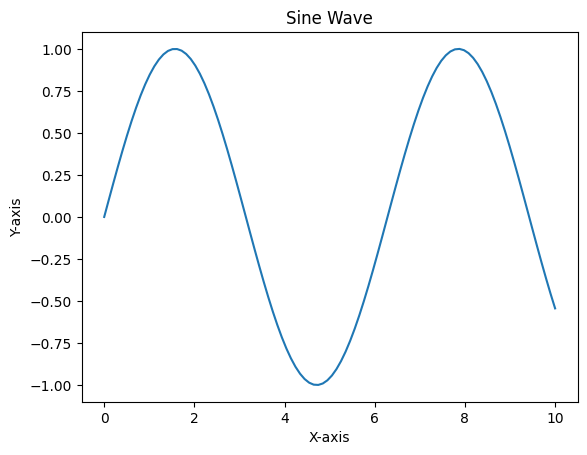

In [58]:
# Basic Plotting
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)
y = np.sin(x)
#plt.style.use('classic')

plt.plot(x, y)
plt.title('Sine Wave')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

%matplotlib inline

Lets do a scatter plot, while manipulating some of the attributes of the points to be plotted:
- Colors
- Point sizes

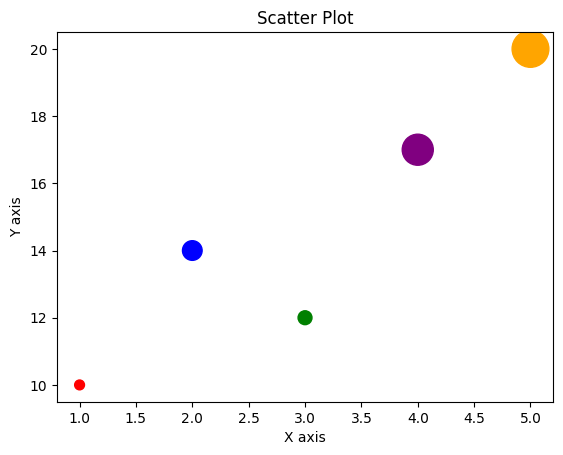

In [59]:
import matplotlib.pyplot as plt

# Data for the scatter plot
x = [1, 2, 3, 4, 5]
y = [10, 14, 12, 17, 20]
colors = ['red', 'blue', 'green', 'purple', 'orange']
sizes = [50, 200, 100, 500, 700]  # Adjust the size of the points

plt.scatter(x, y, c=colors, s=sizes)
plt.title('Scatter Plot')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()


This next code snippet is to generate a color chart of all the named colors in Matplotlib ... it is advanced and not fully related to what we are doing other than providing a reference chart to use for Colors

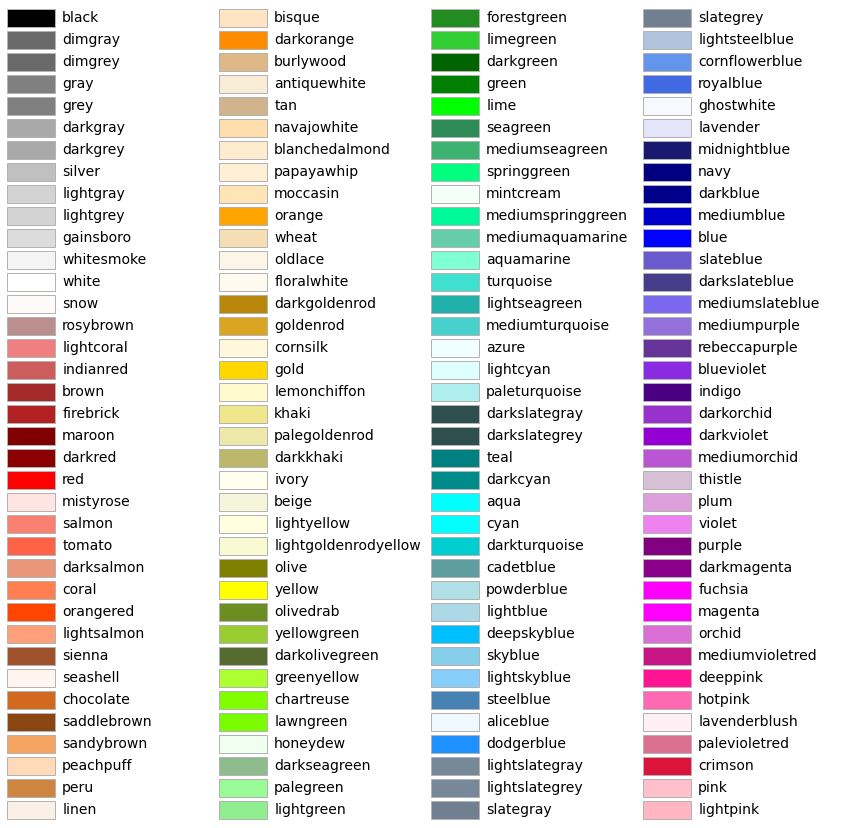

In [60]:
import math

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle


def plot_colortable(colors, *, ncols=4, sort_colors=True):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        names = sorted(
            colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    else:
        names = list(colors)

    n = len(names)
    nrows = math.ceil(n / ncols)

    width = cell_width * ncols + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * ncols)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig
plot_colortable(mcolors.CSS4_COLORS)
plt.show()

Lets do another line plot with some more advanced features:
- Showing points with specific markers
- Chossing the connecting line style
- Changing the marker fill color

__[Here](https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html)__ is a reference to the different styling options you can use

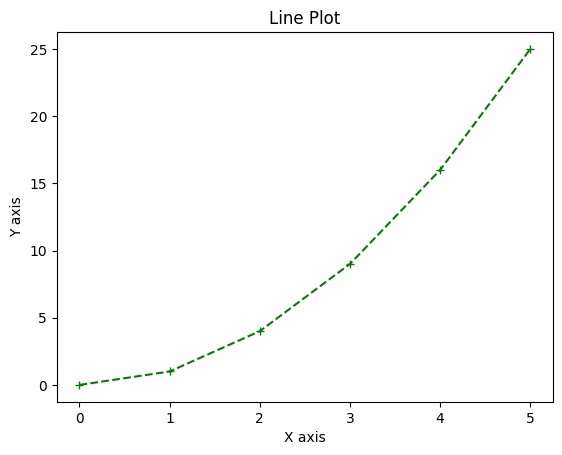

In [63]:
# Data for the line plot
x = [0, 1, 2, 3, 4, 5]
y = [0, 1, 4, 9, 16, 25]

plt.plot(x, y, color='green', marker='+', markerfacecolor= 'blue', linestyle='--')
plt.title('Line Plot')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()


Pie Charts

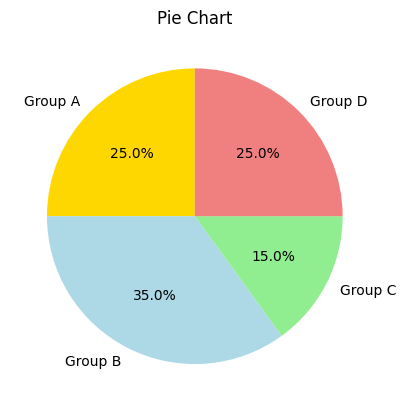

In [64]:
# Data for the pie chart
sizes = [25, 35, 15, 25]
labels = ['Group A', 'Group B', 'Group C', 'Group D']
colors = ['gold', 'lightblue', 'lightgreen', 'lightcoral']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart')
plt.show()


Bar plot

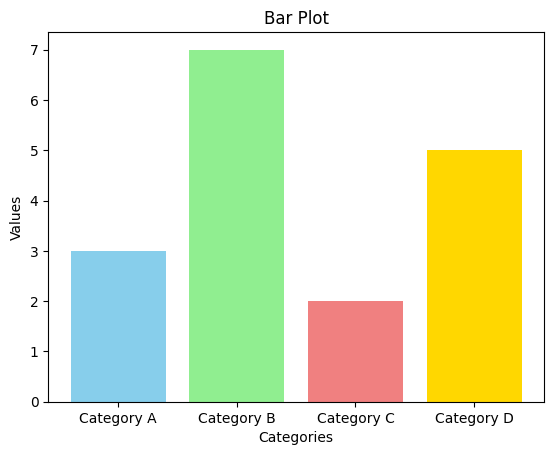

In [65]:
# Data for the bar plot
categories = ['Category A', 'Category B', 'Category C', 'Category D']
values = [3, 7, 2, 5]
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold']

plt.bar(categories, values, color=colors)
plt.title('Bar Plot')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()


Histograms ... can get very detailed:
- Providing number of bins
- Bin colors
- Bin edge Colors
- Bin wedth

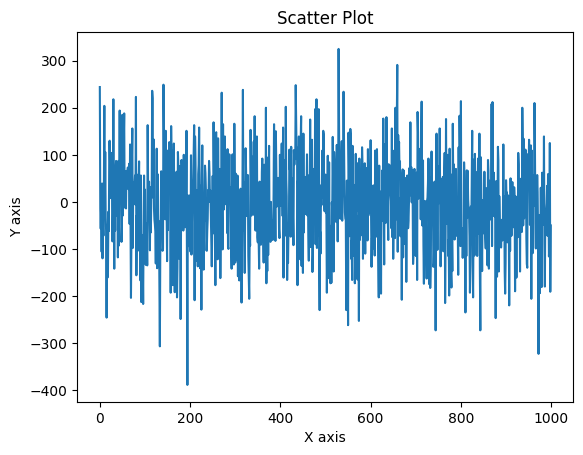

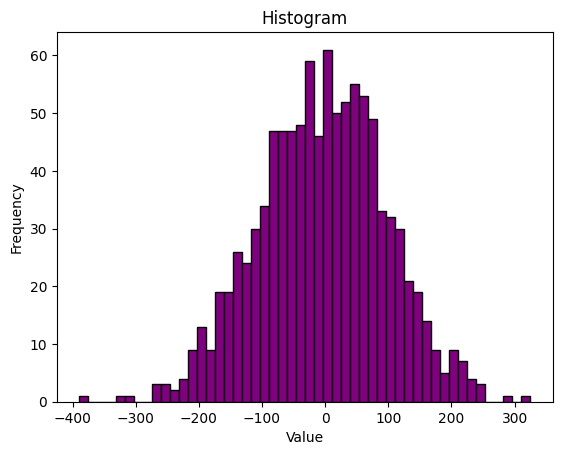

In [75]:
# Data for the histogram
import numpy as np
#data = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5]

# Alternative data 1 ... uniform distribution
#data = np.random.randint(0,10,1000)

# Alternative data2 ... normal distribution
data = np.random.normal(0,10,1000)
data = (data*10).astype(int)


x = [n for n in range(1000)]
plt.plot(x, data)
plt.title('Scatter Plot')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

#plt.hist(data, bins=5, color='purple', edgecolor='black')
#plt.hist(data, bins=10, color='purple', edgecolor='black')
plt.hist(data, bins=50, color='purple', edgecolor='black')
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
